# Analysis of Computer Game Sales at the StreamChick Store.

The online store "StreamChick" sells computers games all around the world. Available historical data on game sales, user and critic reviews, genres, and platforms (e.g., Xbox or PlayStation) are accessible through open sources. The task is to identify key patterns that determine a game's success. This would enable making an informed bet on a potentially popular product and planning advertising campaigns. The data available dates back until 2016.

In the dataset, there is an abbreviation for ESRB (Entertainment Software Rating Board) — it’s an association that evaluates video game content and assigns a suitable age category, like “For adults”, “For children under the age of 7” or “For teenagers”.  

<a id='Content'></a>
**Project Content** \
[Loading Data](#Loading-Data)\
[Data Preprocessing](#Data-Preprocessing)\
[Scientific Analysis of Data](#Scientific-Analysis-of-Data)\
[User Profile](#User-Profile)\
[Hypothesis Testing](#Hypothesis-Testing)\
[Overall Conclusion](#Overall-Conclusion)

In [1]:
# importing libraries at the beginning of the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
import scipy.stats as stats
import matplotlib


## Loading Data
<a id='Loading-Data'></a> [To Content](#To-Content)

In [2]:
# setting up the standard dataFrame
#pd.set_option('max_rows', 5)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# import data
try:
    data = pd.read_csv('/Users/roman_yakovlev/Downloads/Практикум_DS/Проекты/Project_5_Games(Sborniy)/games.csv')    
except:
    data = pd.read_csv('/datasets/games.csv')
    
# print information about data structure and data for each dataFrame
def get_info(dataset):
        dataset.info(), 
        return dataset.head(10)
        
display(get_info(data));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


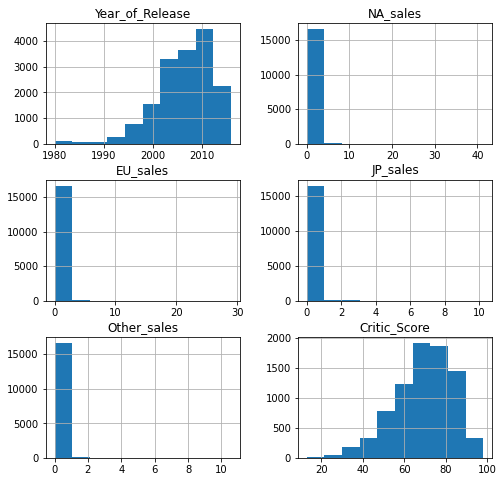

In [3]:
# display overall distribution of data
data.hist(figsize=(8, 8));

**Results**  
After preliminary analysis of the loaded data, it is necessary to perform the following steps: 
1. Check the original data for missing values and duplicates and remove them.
2. Correct the data types to ensure they are suitable for further analysis.
3. Rename column names and game titles (to check for duplicates).
A notable observation from the distribution graphs of the data is that most-selling games have sales around 1-10 millions copies, which needs to be examined more closely in the future.

## Data Preprocessing
<a id='Data-Preprocessing'></a> [To Content](#To-Content)

In [4]:
# replace column names and values in game titles, platforms, and genres with lowercase
data.columns = data.columns.str.lower()

data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# look for missing values
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data[data['name'].isna()&data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Excluding two incomplete game records due to missing data on genre and reviews are considered informational and low-value for further analysis, so we recommend excluding them.

In [7]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Replacing missing release years with 0 as a placeholder value to preserve data during analysis.

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [9]:
# checking columns for ratings
display(data['critic_score'].unique())

display(data['user_score'].unique())

display(data['rating'].unique())


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In the `critic_score` column, scores are only whole numbers, so we recommend replacing missing values 'nan' with 0 and then converting the column to type int32 for optimized resource usage and accurate rating counts.

In the `user_score` column, there are both 'nan' and 'tbd' data. 'TBD' indicates the absence of a score, so we recommend replacing both indicators with 0 as a placeholder value and converting the column type to float32 to save resources.

In the `rating` column, missing values 'nan' should be replaced with a text indicator 'TBD - No Rating'.

In [10]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd',0)
data['rating'] = data['rating'].fillna('tbd')

# display the final data for verification and further processing
display(data.isna().sum())
display(data.info());

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [11]:
# convert the columns `year_of_release` and `critic_score` to type int32
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype(np.int32)

# convert the columns with sales data and `user_score` to float32
data[['na_sales', 'eu_sales','jp_sales', 'other_sales','user_score']] = data[['na_sales', 'eu_sales','jp_sales', 'other_sales','user_score']].astype(np.float32)


In [12]:
# calculate total sales across all regions and store them in a separate column
data['world_sales'] = round(data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'],2)


**Results**

During the data preprocessing stage, all missing values were handled as follows:

- Rows with missing game name or genre were removed.
- Missing release years were filled with an indicator value of 0.
- Missing values in the `critic_score` and `user_score` columns were replaced with zero (similarly for 'tbd' values in `user_score`), indicating no rating. Replacing these values with median or any other value at this stage would introduce data bias.
- Missing values in the `rating` column were replaced with 'TBD', indicating that there is no rating.

Columns containing integer values (`year_of_release`, `critic_score`) were converted to type int32, and columns with sales and `user_score` (containing floating-point numbers) were converted to type float32. Additionally, a new column for total sales across all regions was added.

## Exploratory Data Analysis
<a id='Exploratory-Data-Analysis'></a> [To Content](#To-content)

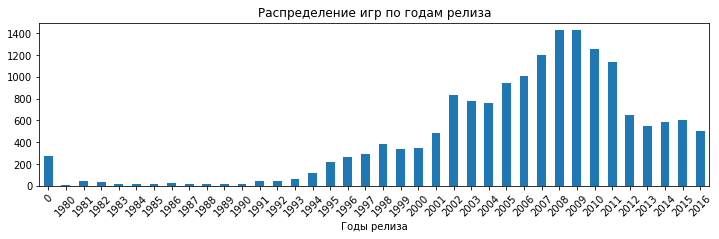

In [13]:
# check how many games were released in different years
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar',figsize=[12, 3])
plt.xlabel('Years of release')
plt.title('Distribution of games by release year')
plt.xticks(rotation=45);
plt.show()

Let's try to fill in the missing release years, as indicated on the graph with a value of "0". This is because there may be some games that were released on different platforms at different times. We'll attempt to match games with the same name and fill in the gaps for each platform by using the median release year.

We will also handle cases where the game title includes a release year, and if no data is available for that specific year, we'll use it as the reference point and exclude any other relevant information about those games, as they are essentially useless for analyzing trends (it's unclear to which year the sales data should be attributed).

Количество пропусков по данным года релиза после обработки составило: 139
Процент, исключенных значений без года выпуска составил: 0.83169%


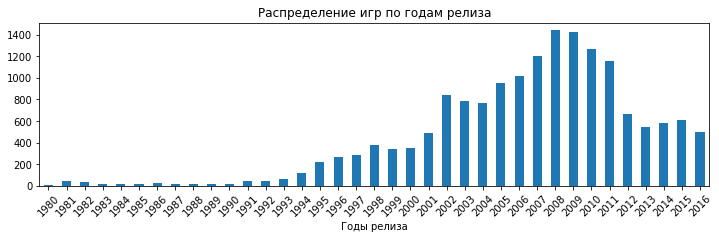

In [14]:
# select games with missing release years
games_wo_year = data[data['year_of_release']==0]['name'].unique()

# compare the names with the main table, and if there are duplicates, calculate the median by year (excluding rows with a release year of zero)
for name in games_wo_year:
    data.loc[(data['name']==name)&(data['year_of_release']==0),'year_of_release'] = data[(data['name']==name)&(data['year_of_release']!=0)]['year_of_release'].median()

# let's check the game titles for the presence of a year and add it to the corresponding field
years = []
for i in range(1980,2017):
    years.append(str(i))

for index, row in data.iterrows():
    if pd.isna(row['year_of_release']):
        game_name = row['name'].split(' ')
        for i in game_name:
            if (i in years) and (len(i)==4):
                data.loc[index,'year_of_release'] = int(i)

# display the final number of missing values in the release year column
print(f'The number of missing values in the release year data after processing is: {data["year_of_release"].isna().sum()}')

# calculate the percentage of excluded data
data_new = data.dropna(subset=['year_of_release']).reset_index(drop=True)
print(f'The percentage of excluded values without a release year is: {1 - data_new.shape[0] / data.shape[0]:.5%}')

# remove the remaining missing values and correct the data type
data = data_new
data['year_of_release'] = data['year_of_release'].astype(np.int32)

plt.figure(figsize=[12, 3])
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar')
plt.xlabel('Годы релиза')
plt.title('Распределение игр по годам релиза')
plt.xticks(rotation=45)
plt.show();


**Conclusion**  
Judging by the graph, the number of game releases before 1991 is quite insignificant—data from these years can likely be disregarded when forecasting trends for 2017.

Let's examine how sales have changed across platforms. We'll select platforms with the highest total sales and plot the distribution by year. We'll also check the typical timeframe in which new platforms appear and old ones disappear.

,world_sales
platform,
ps2,1250.92
x360,966.67
ps3,935.19
wii,903.31
ds,804.28
ps,727.58
ps4,314.14
gba,313.73
psp,293.57


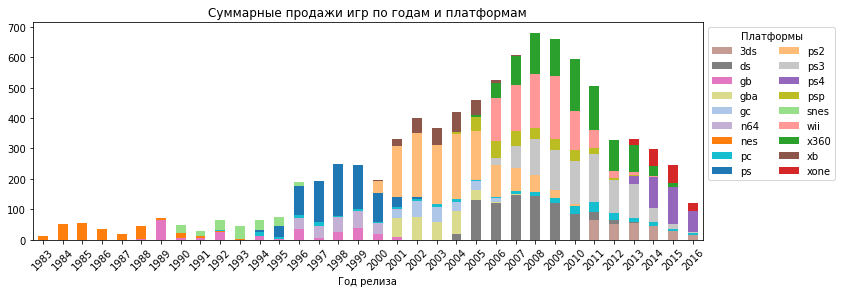

In [15]:
# calculate sales by platform
data_pivot = data.pivot_table(index='platform', values = 'world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
display(data_pivot)

# select platforms with total sales exceeding 100 million
data_pivot_over100 = data_pivot[data_pivot['world_sales']>100]
platform_best_sales = data_pivot_over100.index
data_best_sales = data[data['platform'].isin(platform_best_sales)]

# compile an aggregated table with sales data for the selected platforms, broken down by year
data_bs_pivot = data_best_sales.pivot_table(index='year_of_release', columns='platform', values = 'world_sales', aggfunc='sum')
data_bs_pivot = data_bs_pivot.reset_index()

# plot a bar chart
# create a list of different contrasting colors (using the standard palette has too many shades)
try:
    cmap=matplotlib.colormaps['tab20'] #на разных версиях matplotlib вызывает палитру по-разному
except:
    cmap = plt.get_cmap('tab20')

colors = [cmap(i) for i in np.random.choice(20, 18, replace=False)]

data_bs_pivot.plot.bar(x='year_of_release', 
                       stacked=True, 
                       figsize=(12, 4),
                       title='Total game sales by year and platform',
                       xlabel='Year of release',
                       color=colors)
plt.xticks(rotation=45)
plt.legend(title='Platforms', bbox_to_anchor=(1, 1),ncol=2)
plt.show();

In [16]:
# also, let's accurately calculate the number of years of sales by platform
sales_period = data.groupby('platform')['year_of_release'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)

sales_period.describe()

,count
count,31.00
mean,7.84
std,5.11
min,1.00
25%,4.00
50%,8.00
75%,11.00
max,26.00


**Conclusion**  

Based on the aggregated data and the distribution graphs of sales by year and platform, we can assess the periods of startup, growth, and decline in sales for various platforms over time. On average, a platform "lives" for 8 years, with a minimum lifespan of 1 year (for experimental platforms like PCFX and TG16), while the longest-living platform, the PC, has lasted 26 years. The change in the lifespan of platforms is influenced by technological limitations of generations, as game consoles are typically released with fixed specifications. As these specifications become outdated, the ability to continue producing more advanced games diminishes, leading to a generational shift in consoles and/or the emergence of new, more modern platforms. This also explains the longevity of games on personal computers, as they can be improved through the replacement of individual components.

Taking into account the sales data of platforms broken down by year, it can be observed that for forecasting purposes for the upcoming year (period), data from long-outdated platforms will be irrelevant due to the shift across several generations. To determine the **relevant period** for forecasting, we can consider all platforms with sales in the last (current) year and analyze the sales dynamics for them since the last technological transition. This way, we focus on developing and promising platforms rather than relying on data from platforms that are already declining.

In [17]:
# look which games were sold on what platforms this year
platform_2016 = data[data["year_of_release"]==2016]["platform"].unique()
print('In 2016, the market featured games from the following platforms: ', ", ".join(map(str, platform_2016)))

В 2016 году на рынке присутствовать игры следующих платформ:  ps4, 3ds, xone, wiiu, ps3, pc, x360, psv, wii


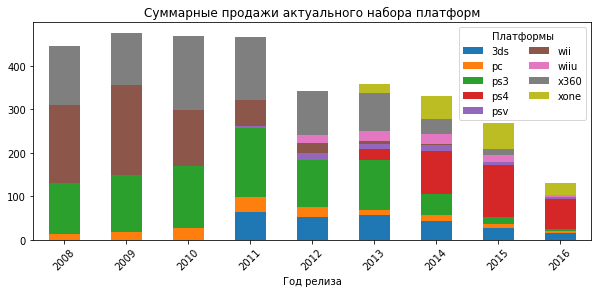

In [18]:
# choose sales data for these platforms over the last 8 years to select a relevant time period
data_actual = data[(data["year_of_release"]>=2008)&(data['platform'].isin(platform_2016))]

# build a bar graph
data_actual_pivot = data_actual.pivot_table(index='year_of_release', columns='platform', values = 'world_sales', aggfunc='sum')
data_actual_pivot = data_actual_pivot.reset_index()

data_actual_pivot.plot.bar(x='year_of_release', 
                       stacked=True, 
                       figsize=(10, 4),
                       title='Total sales for the relevant set of platforms',
                       xlabel='Year of release')
plt.xticks(rotation=45)
plt.legend(title='Platforms', bbox_to_anchor=(1, 1),ncol=2)
plt.show();


From a more refined graph, it is evident that the current leaders, PS4 and Xbox One, entered the market in 2013 (according to open sources, at the end of 2013). Therefore, sales in 2013, when platforms from the previous generation still dominated, are not entirely relevant to the current market. Thus, it is proposed to consider the relevant period for forecasting as the years 2014 to 2016, when the leadership of the new platforms is clear, and the influence of the declining platforms is no longer critical.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 31 to 16573
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1676 non-null   object 
 1   platform         1676 non-null   object 
 2   year_of_release  1676 non-null   int32  
 3   genre            1676 non-null   object 
 4   na_sales         1676 non-null   float32
 5   eu_sales         1676 non-null   float32
 6   jp_sales         1676 non-null   float32
 7   other_sales      1676 non-null   float32
 8   critic_score     1676 non-null   int32  
 9   user_score       1676 non-null   float32
 10  rating           1676 non-null   object 
 11  world_sales      1676 non-null   float32
dtypes: float32(6), int32(2), object(4)
memory usage: 117.8+ KB


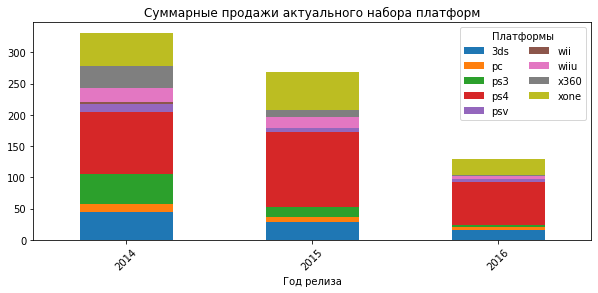

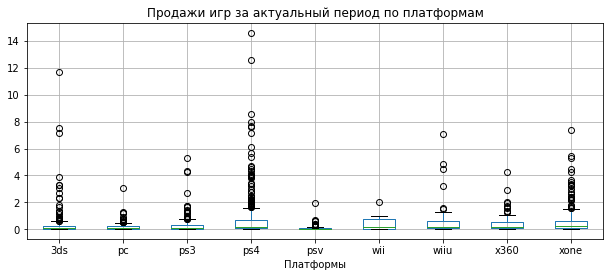

In [19]:
# select the sales data for these platforms over the last 8 years to define the relevant period
data_actual = data[(data["year_of_release"]>=2014)&(data['platform'].isin(platform_2016))]

# take a look at the resulting sales sample
data_actual.info()

# plot a bar chart
data_actual_pivot = data_actual.pivot_table(index='year_of_release', columns='platform', values = 'world_sales', aggfunc='sum')
data_actual_pivot = data_actual_pivot.reset_index()

data_actual_pivot.plot.bar(x='year_of_release', 
                       stacked=True, 
                       figsize=(10, 4),
                       title='Total sales of the relevant set of platforms',
                       xlabel='Year of release')
plt.xticks(rotation=45)
plt.legend(title='Platforms', bbox_to_anchor=(1, 1),ncol=2)
plt.show();

# plot a boxplot of sales by platform for the relevant period
ax = data_actual.boxplot(by='platform', column='world_sales', figsize=(10,4))
ax.set_xlabel('Platforms')
ax.set_title('Game sales by platform for the relevant period')
ax.get_figure().suptitle(None);
#ax.set_ylim(0,1.5)


In [20]:
# calculate the total sales of outliers (bestsellers) for PS4
Q1 = data_actual[data_actual['platform']=='ps4']['world_sales'].quantile(0.25)
Q3 = data_actual[data_actual['platform']=='ps4']['world_sales'].quantile(0.75)
IQR = Q3 - Q1
data_actual_ps4 = data_actual.query("platform == 'ps4' and world_sales > @Q3 + 1.5*@IQR")

print('The total sales of bestsellers for PS4: ', data_actual_ps4['world_sales'].sum())
print('The total sales of all games on PS4 for the relevant period: ', data_actual[data_actual['platform']=='ps4']['world_sales'].sum())

# calculate the total sales of outliers (bestsellers) for Xbox One
Q1 = data_actual[data_actual['platform']=='xone']['world_sales'].quantile(0.25)
Q3 = data_actual[data_actual['platform']=='xone']['world_sales'].quantile(0.75)
IQR = Q3 - Q1
data_actual_xone = data_actual.query("platform == 'xone' and world_sales > @Q3 + 1.5*@IQR")

print('The total sales of bestsellers for Xbox One: ', data_actual_xone['world_sales'].sum())
print('The total sales of all games on Xbox One for the relevant period: ', data_actual[data_actual['platform']=='xone']['world_sales'].sum())

Сумма продаж бестселлеров по PS4:  201.14001
Сумма продаж всех игр на Ps4 за актуальный период:  288.15
Сумма продаж бестселлеров по Xbox One:  77.56
Сумма продаж всех игр на Xbox One за актуальный период:  140.35999


**Conclusion**  

Based on the graph data from the last 8 years, it is evident that at the beginning of the selected period, three platforms from the previous technological generation dominated: Playstation 3, Xbox 360, and Nintendo Wii, all from long-standing leaders Sony, Microsoft, and Nintendo, respectively. By the current moment, there has been a generational shift, with these platforms being replaced by new ones from the same manufacturers—Playstation 4, Xbox One, and Nintendo 3DS. The market is also supplemented by declining generations and niche platforms (mobile gaming—PSV, Wii U). 

Additionally, there is a noticeable trend of decreasing sales overall (which is also observed in the general graph with the initial data). This may be attributed to the increasing quality of developed games and the complexity of their production against the backdrop of emerging new, more sophisticated technologies.

For further analysis, the **relevant period** has been chosen from 2014 onward to exclude the influence of platforms from the declining technological generation. In this relevant period, the leadership of PS4 is clear, followed by Xbox One, while the declining platforms from the previous generation significantly reduce sales, and niche platforms (PC, Wii U, PSV) roughly maintain their positions.

The boxplot graph also shows that maximum sales were achieved by the leading platforms of the current generation—PS4 and Xbox One—with the highest number of outliers (bestsellers), which in turn contributed to two-thirds of all sales for PS4 and half of the sales for games on Xbox One.

Let's examine how user and critic reviews influence sales within a popular platform. To do this, we will create a scatter plot and calculate the correlation between reviews and sales. Given the presence of missing values in the critic and user ratings, it would be better to focus on the platform with the highest sales and the most ratings for a more accurate analysis.

In [21]:
# select the most popular platform considering the number of released games and the number of ratings
games_scores = pd.DataFrame()
games_scores['games'] = data_actual.groupby('platform')['world_sales'].count()
# calculate the number of critic ratings for all relevant platforms
games_scores['critic_scores'] = data_actual[data_actual['critic_score']>0].groupby('platform')['critic_score'].count()
games_scores['user_scores'] = data_actual[data_actual['user_score']>0].groupby('platform')['user_score'].count()

games_scores.head(10)

,games,critic_scores,user_scores
platform,,,
3ds,212,51.00,55
pc,151,116.00,122
ps3,219,36.00,98
ps4,376,237.00,242
psv,295,54.00,73
wii,11,NaN,2
wiiu,73,43.00,48
x360,111,26.00,83
xone,228,155.00,165


The most games were sold on the PS4 platform, which also has the highest number of ratings. In comparison, its main competitor, the Xbox 360, has sales and ratings that are less than half of those for PS4. Therefore, we will examine the data on the relevant relationships using PS4 as an example.

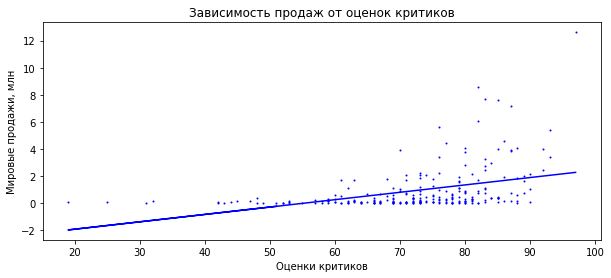

Коэффициент корреляции продаж с оценками критиков: 0.4


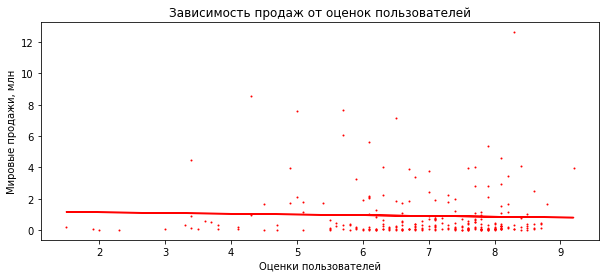

Коэффициент корреляции продаж с оценками пользователей: -0.04


In [37]:
# select the data for PS4 and create scatter plots between game sales and ratings
ps4 = data_actual[(data_actual['platform']=='ps4')&(data_actual['critic_score']>0)]

# by critic ratings
ps4.plot.scatter('critic_score','world_sales',marker='o',figsize=(10,4), color='blue',s=1)
plt.xlabel('Critic ratings')
plt.ylabel('World sales, mln')
plt.title('Dependency of sales on critic ratings')

z = np.polyfit(ps4['critic_score'],ps4['world_sales'],1)
p = np.poly1d(z)
plt.plot(ps4['critic_score'], p(ps4['critic_score']),'b');
plt.show()

print(f'The correlation coefficient of sales with critic ratings: {ps4["world_sales"].corr(ps4["critic_score"]):.2}')

# by users ratings
ps4 = data_actual[(data_actual['platform']=='ps4')&(data_actual['user_score']>0)]

ps4.plot.scatter('user_score','world_sales',marker='o',figsize=(10,4), color='red',s=1)
plt.xlabel('User ratings')
plt.ylabel('World sales, mln')
plt.title('Dependency of sales on user ratings')


z = np.polyfit(ps4['user_score'],ps4['world_sales'],1)
p = np.poly1d(z)
plt.plot(ps4['user_score'], p(ps4['user_score']),'r');
plt.show()

print(f'The correlation coefficient of sales with user ratings: {ps4["world_sales"].corr(ps4["user_score"]):.2}')

In [38]:
# calculate the correlation levels of ratings with sales for two other popular platforms - Xbox One and Nintendo 3DS
xone_3ds = ['xone','3ds']

for platform in xone_3ds:
    xone_3ds_data = data_actual[(data_actual['platform']==platform)&(data_actual['critic_score']>0)]
    print(f'The correlation coefficient of sales on {platform} with critic ratings: {xone_3ds_data["world_sales"].corr(xone_3ds_data["critic_score"]):.2}')
    xone_3ds_data = data_actual[(data_actual['platform']==platform)&(data_actual['user_score']>0)]
    print(f'The correlation coefficient of sales on {platform} with user ratings:: {xone_3ds_data["world_sales"].corr(xone_3ds_data["user_score"]):.2}')

Коэффициент корреляции продаж на xone с оценками критиков: 0.43
Коэффициент корреляции продаж на xone с оценками пользователей: -0.07
Коэффициент корреляции продаж на 3ds с оценками критиков: 0.31
Коэффициент корреляции продаж на 3ds с оценками пользователей: 0.22


**Conclusion**  

The graphs and calculated data show that global sales are more positively correlated with critic ratings than with user ratings. Moreover, the correlation between sales and user ratings is virtually nonexistent (-0.04). Critic ratings are likely more significant due to their scale and promotion—this information is widely available and advertised by companies. However, even critic ratings have a moderate correlation level (0.4), which cannot be considered a strong dependency, indicating that other significant factors likely influence sales.

Similar correlation levels are observed for other popular platforms, such as Xbox One and Nintendo 3DS. However, for Nintendo 3DS, possibly due to an even smaller dataset of ratings, the correlation between critic ratings and sales is observed to be very weak.

Let's examine the overall distribution of games by genre, identify the most profitable genres, and check if genres with high and low sales stand out.

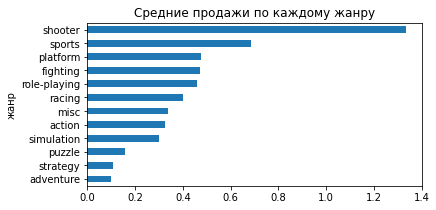

In [49]:
# calculate the average sales for each genre to assess profitability
data_actual.groupby('genre')['world_sales'].mean().sort_values().plot.barh(figsize=(6,3), 
                                                                           ylabel='sales, mln',
                                                                           xlabel='genre',
                                                                           title='Average sales by genre')
plt.show()


**Conclusion**  

The most profitable genre is shooter, with an average game in this genre earning $1.4 million, which is double that of the next most profitable genre, sports ($0.7 million). The least profitable genres are adventure and strategy, each averaging $0.1 million per game.

**Conclusion on the Exploratory Data Analysis Section**  

In this section, we further analyzed the missing release years of games, as this information is critically important for considering other data. We were able to supplement the data using information from game titles and related data (as games often release on multiple platforms simultaneously), and the remaining missing values were excluded (less than 1% of the data).  

Next, we examined the development of sales across platforms over time, considering the average lifespan of a platform (8 years), and selected data for the relevant period (from the start of the current technological generation) for all active platforms at the time of data collection (as of 2016). Thus, we focused on data from 9 platforms—PS4, 3DS, Xbox One, Wii U, PS3, PC, Xbox 360, PSV, and Wii—covering the period from 2014 to 2016. This period included the three most popular platforms from the previous technological generation (PS3, Xbox 360, Wii), which had significantly decreased sales, alongside three equivalent products from the current generation (PS4, Xbox One, 3DS), which were gaining momentum, as well as niche platforms for mobile and PC gaming.  

In the selected data, we checked for any correlation between critic and user ratings with global sales on the most popular platform with the highest number of ratings (PS4). A moderate positive correlation was observed with critic ratings (0.4), while the correlation with user ratings was essentially nonexistent (-0.04), which was also consistent with the results for two other popular platforms (Xbox One and 3DS).  

From a genre perspective, the action genre leads in terms of the number of games and sales (totaling $200 million); however, the absolute leader in average profitability per game is the shooter genre, which earns $1.4 million—twice that of the next most profitable genre, sports ($0.7 million). The least profitable genres are adventure and strategy, each averaging $0.1 million per game.

## User Profile
<a id='User-Profile'></a> [To content](#To-content)

We will create user profiles for the three main sales regions - North America, Europe, and Japan, focusing on popular platforms and genres.

In [50]:
# gather sales data across different platforms in the specified three regions
regions = ['na_sales','eu_sales','jp_sales']
user_picture = pd.DataFrame()

for region in regions:
    user_picture[region] = data_actual.groupby('platform')[region].sum()
    user_picture[region+' %'] = data_actual.groupby('platform')[region].sum()/data_actual[region].sum()*100

user_picture


,na_sales,na_sales %,eu_sales,eu_sales %,jp_sales,jp_sales %
platform,,,,,,
3ds,22.64,7.97,16.12,5.96,44.24,47.71
pc,7.23,2.55,17.97,6.64,0.00,0.00
ps3,22.05,7.76,25.54,9.44,11.22,12.10
ps4,98.61,34.71,130.04,48.04,15.02,16.20
psv,2.52,0.89,3.53,1.30,14.54,15.68
wii,2.08,0.73,2.59,0.96,0.00,0.00
wiiu,19.36,6.82,13.15,4.86,7.31,7.88
x360,28.30,9.96,15.49,5.72,0.08,0.09
xone,81.27,28.61,46.25,17.09,0.32,0.35


In [51]:
# select the top 5 platforms in each region
for region in regions:
    display(user_picture[[region, region+' %']].sort_values(by=region,ascending=False).iloc[:5])

,na_sales,na_sales %
platform,,
ps4,98.61,34.71
xone,81.27,28.61
x360,28.30,9.96
3ds,22.64,7.97
ps3,22.05,7.76


,eu_sales,eu_sales %
platform,,
ps4,130.04,48.04
xone,46.25,17.09
ps3,25.54,9.44
pc,17.97,6.64
3ds,16.12,5.96


,jp_sales,jp_sales %
platform,,
3ds,44.24,47.71
ps4,15.02,16.20
psv,14.54,15.68
ps3,11.22,12.10
wiiu,7.31,7.88


In the breakdown by platforms, we see that during the relevant period in North America, the leading platform is Sony’s PS4 (34.71% of sales), followed closely by the new domestic platform from Microsoft, Xbox One (28.61% of sales). There is a significant gap with the previous generation platforms, x360 (10%), ps3 (7.8%), and the current Nintendo 3ds platform (8%).   

In the European top rankings, the leaders are the same, but the sales gap is much more pronounced: PS4 occupies almost half of the market (48%), while Xbox One only accounts for 17%. Among the “followers,” there is also a specific pattern—besides the old platform ps3 (9.5%) and the closing platform 3ds (6%), PC games occupy a small niche with 6.6% of sales.  

In the Japanese market, domestic platforms are unequivocally in the lead, with Nintendo’s newer platform, the 3ds, taking first place (47.71% of sales). Following that is Sony’s ps4 (16%), and the top is rounded out by niche mobile gaming platforms, psv (15.7%) and wii (7.9%), as well as ps3 (12.1%).

In [52]:
# gather data on game sales by genre in the specified three regions
regions = ['na_sales','eu_sales','jp_sales']
user_picture = pd.DataFrame()

for region in regions:
    user_picture[region] = data_actual.groupby('genre')[region].sum()
    user_picture[region+' %'] = data_actual.groupby('genre')[region].sum()/data_actual[region].sum()*100

user_picture

,na_sales,na_sales %,eu_sales,eu_sales %,jp_sales,jp_sales %
genre,,,,,,
action,72.53,25.53,74.68,27.59,29.38,31.68
adventure,5.64,1.99,6.49,2.40,3.55,3.83
fighting,12.43,4.38,6.69,2.47,6.37,6.87
misc,15.05,5.30,12.86,4.75,5.59,6.03
platform,6.79,2.39,6.80,2.51,2.69,2.90
puzzle,0.65,0.23,0.52,0.19,0.93,1.00
racing,8.74,3.08,14.13,5.22,1.76,1.90
role-playing,33.47,11.78,28.17,10.41,31.16,33.60
shooter,79.02,27.82,65.52,24.21,4.87,5.25


In [53]:
# select the top 5 genres in each region.
for region in regions:
    display(user_picture[[region, region+' %']].sort_values(by=region,ascending=False).iloc[:5])

,na_sales,na_sales %
genre,,
shooter,79.02,27.82
action,72.53,25.53
sports,46.13,16.24
role-playing,33.47,11.78
misc,15.05,5.30


,eu_sales,eu_sales %
genre,,
action,74.68,27.59
shooter,65.52,24.21
sports,45.73,16.89
role-playing,28.17,10.41
racing,14.13,5.22


,jp_sales,jp_sales %
genre,,
role-playing,31.16,33.60
action,29.38,31.68
fighting,6.37,6.87
misc,5.59,6.03
shooter,4.87,5.25


In **North America** and **Europe**, the genre preferences of games show minimal differences; the leaders in the top 5 of both regions are alternately **shooter** (27.8% in NA and 24.2% in EU) and **action** (25.5% in NA and 27.6% in EU). Following these are **sports** (approximately 16% of sales) and **RPG** (11.8% and 10.4% respectively).

The **Japanese** market is somewhat different; here, **RPG**s historically generate greater interest (33.6% of sales) and are widely represented on local platforms. Next is **action** (31.7%), while the subsequent genres lag significantly behind — **fighting** (6.8%), **shooter** (5.2%), and other genres (6%).

The similarities in interests between the American and European markets, and the contrasting differences with Japan, are likely due to cultural features and historical connections. Similar traits can be observed in other cultural spheres (film/literature/comics/animation).

In [54]:
# gather data on game sales broken down by ratings in the specified three regions
regions = ['na_sales','eu_sales','jp_sales']
user_picture = pd.DataFrame()

for region in regions:
    user_picture[region] = data_actual.groupby('rating')[region].sum()
    user_picture[region+' %'] = data_actual.groupby('rating')[region].sum()/data_actual[region].sum()*100

user_picture

,na_sales,na_sales %,eu_sales,eu_sales %,jp_sales,jp_sales %
rating,,,,,,
E,50.74,17.86,58.06,21.45,8.94,9.64
E10+,33.23,11.70,26.16,9.66,4.46,4.81
M,96.42,33.94,93.44,34.52,8.01,8.64
T,38.95,13.71,34.07,12.59,14.78,15.94
tbd,64.72,22.78,58.95,21.78,56.54,60.97


In [55]:
# select the top 5 ratings in each region
for region in regions:
    display(user_picture[[region, region+' %']].sort_values(by=region,ascending=False).iloc[:5])

,na_sales,na_sales %
rating,,
M,96.42,33.94
tbd,64.72,22.78
E,50.74,17.86
T,38.95,13.71
E10+,33.23,11.70


,eu_sales,eu_sales %
rating,,
M,93.44,34.52
tbd,58.95,21.78
E,58.06,21.45
T,34.07,12.59
E10+,26.16,9.66


,jp_sales,jp_sales %
rating,,
tbd,56.54,60.97
T,14.78,15.94
E,8.94,9.64
M,8.01,8.64
E10+,4.46,4.81


Based on the available data for the relevant period, we cannot definitively calculate the relationship between sales and specific ratings (since this is a categorical feature). However, we can observe identical sales volumes for the aggregate of games with the same ratings in **North America** and **Europe**. The leading games in both regions have an M rating for mature audiences, accounting for 33.9% and 34.5% of sales, respectively. Games suitable for all ages, including young children, are in third place for sales (17.9% and 21.4%, respectively), followed by games with ratings T and E10+. It is worth noting that a significant portion consists of games without specified ratings (22% for each region); clarifying these ratings could potentially alter the distribution of evaluations.

For the **Japanese** market, it is challenging to draw similar conclusions due to a significant portion of games in the dataset lacking ratings for this region (61%). Therefore, distortions could either align with the situation in the other two regions or diverge from it. Based on the available data, the leading segment for sales consists of games rated for teenagers (16%), followed by games from other segments E - 9.6%, M - 8.6%, with no clear logic due to the small number of evaluations.

**Conclusion**

Considering the conducted additional analysis, we can specify the portrait of the most typical user for each of the three regions:
- For **North America**: This is a PS4 console owner who prefers games in the shooter or action genres and is over 17 years old. As an alternative, we could assume a younger player (fitting the E rating), but only in the action genre (as it is hard to imagine shooters for young children).
- For **Europe**: This is also a PS4 console owner who prefers action or shooter games, aged over 17 years, with a similar alternative to the North American market.
- For the **Japanese market**: This is definitely a 3DS console owner who prefers RPG or action genres and is of teenage age. Given the lack of a large segment of data on genres for the Japanese region, it is difficult to propose a worthy alternative to the main characteristic.

Additionally, it is worth noting the similarity in genre and platform preferences between the NA and EU regions. In both cases, the PS4 and Xbox One are popular, with shooter and action genres alternating as leaders in both regions. Therefore, releasing a game for both platforms significantly increases the likelihood of boosting sales by tapping into two regional markets on the two most popular platforms. The spread of less popular platforms between regions is more significant, and selecting a universal outsider is not feasible—on the North American market, it is the x360, on the European market, it is the PS3 and PC, and on the Japanese market, it is mobile platforms.

For entering the Japanese market, it makes sense to focus on the requirements of Sony and Nintendo, as all the top sales are for platforms from these two local manufacturers, and to prefer the RPG or action genre.\
From the perspective of ratings, an older audience (from the M rating and stricter) is clearly more financially capable than a younger audience (E, T ratings) that depends on their parents.

## Hypothesis Testing
<a id='Hypothesis-Testing'></a> [To Contents](#To-Contents)

At the request of colleagues, it has been suggested to consider and test several statistical hypotheses based on the available samples:
- The average user ratings for the Xbox One and PC platforms are the same;
- The average user ratings for the Action and Sports genres are different.

To test the **first hypothesis**, it is necessary to form two samples of user ratings for the two specified platforms. If the sample sizes differ significantly, this should be taken into account when setting the test parameters, as the variances of the respective populations may differ (especially if the data in the samples is limited and they are disproportionate to each other in quantity).

The null hypothesis (H0) will state that the average user ratings for games on the Xbox One and PC platforms are equal, while the alternative hypothesis (H1) will state that the average user ratings for games on the Xbox One and PC platforms are not equal. In this case, for the two samples from two populations, we will use the **two-sample t-test for independent samples** (statistical test `st.ttest_ind()`, with the alternative hypothesis parameter set to `two-sided`, as according to the proposed hypotheses, the difference in means may be either positive or negative).

In [56]:
# form two samples of user ratings for the Xbox One and PC platforms
data_xone = data_actual[(data_actual['platform']=='xone')&(data_actual['user_score']>0)]
data_pc = data_actual[(data_actual['platform']=='pc')&(data_actual['user_score']>0)]

# calculate the average ratings for the obtained samples
print(f'The average user rating for games on the Xbox One platform based on the sample:: {data_xone["user_score"].mean():.2f}')
print(f'The average user rating for games on the PC platform based on the sample: {data_pc["user_score"].mean():.2f}')

# compare the sample sizes
display(data_xone.shape)
display(data_pc.shape)

# set the significance level 
# if the p-value is less than this level, we will reject the hypothesis
alpha = 0.05

# since the sample sizes differ by almost three times and the samples themselves are quite small, 
# we will set a parameter to calculate the variance for each sample separately
results = st.ttest_ind(data_xone['user_score'],data_pc['user_score'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')


Среднее значение пользовательских оценок по играм для платформы Xbox One по выборке: 6.59
Среднее значение пользовательских оценок по играм для платформы PC по выборке: 6.30


(165, 12)

(122, 12)

p-значение:  0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


The average ratings are close to each other, and the obtained p-value indicates that the stated (or even larger) differences can occur by chance with a probability of just over 11%. This is a relatively high probability compared to the set significance level of 5%, making it difficult to conclude a significant difference between the average ratings for the specified platforms.

Additionally, this can be inferred from the fact that games are often released on multiple platforms and have similar ratings (as they are essentially the same game adapted to the platform's requirements), which explains the closeness of average ratings between platforms. Moreover, the ratings are given by different users (user groups), so considering these two samples as dependent (and applying the corresponding statistical test) is incorrect.

To test the **second hypothesis**, we also need to form two samples of user ratings for the two specified genres: action and sports. If the sample sizes differ significantly, this will need to be taken into account when setting the test parameters, as the variances of the respective samples may differ (especially if the data in the samples is limited and they are not proportional to each other in quantity). 

The null hypothesis (H0) will state that the average user ratings for action and sports games are equal, while the alternative hypothesis (H1) will state that the average user ratings for action and sports games are not equal. In this case, for the two samples from the two groups, we will use the two-sample t-test for independent samples (stat_test st.ttest_ind()) with the alternative hypothesis parameter set to two-sided, as the difference in means may be in either direction relative to each other according to the specified hypotheses.

In [57]:
# form two samples of user ratings for the platforms Xbox One and PC
data_action = data_actual[(data_actual['genre']=='action')]
data_sports = data_actual[(data_actual['genre']=='sports')]

# calculate the average ratings based on the obtained samples
print(f'The average user rating for games in the action genre based on the sample: {data_action["user_score"].mean():.2f}')
print(f'The average user rating for games in the sports genre based on the sample: {data_sports["user_score"].mean():.2f}')

# compare the sample sizes
display(data_action.shape)
display(data_sports.shape)

# set the significance level.
# if the p-value is less than this level, we will reject the null hypothesis
alpha = 0.05

# since the sizes of the samples differ by almost two times, and the samples themselves are quite small,
# let's set a parameter to calculate the variance for each sample separately
results = st.ttest_ind(data_action['user_score'],data_sports['user_score'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')


Среднее значение пользовательских оценок по играм жанра action по выборке: 3.28
Среднее значение пользовательских оценок по играм жанра sports по выборке 4.15


(613, 12)

(160, 12)

p-значение:  0.0007303408426159307
Отвергаем нулевую гипотезу


The average ratings for the two genres differ, and the obtained p-value indicates that such (or even greater) differences could occur by chance with a probability of just over 0.07% (assuming the null hypothesis is true). This is clearly a significantly low probability compared to the set significance threshold of 5% (and even 1%), allowing us to conclude that the difference in average ratings for the specified genres is not random. Therefore, we can reject the null hypothesis in favor of the alternative one. Additionally, the difference in average ratings can be attributed to the fundamental differences between the genres, which attract different audiences, and the games are rated based on various parameters.

## Overall Conclusion
<a id='Overall-Conclusion'></a> [Back to contents](#Back-to-contents)

During the data analysis, **preliminary data processing** was conducted, which included converting the column names and the values in the columns for game titles, platforms, and genres to lowercase. Additionally, several records (2) with missing game titles and genre names were excluded. Missing values in the columns for the game's release year, critic ratings, user ratings, and age rating were filled with indicator values for subsequent consideration in the analysis. The types in the columns with integer data (release year, critic ratings) and floating-point data (sales data, user ratings) were converted to more compact `int32` and `float32`. A column with total worldwide sales for each game was added. No duplicates were found.

In the **exploratory analysis**, missing values in the release years of the games were further analyzed, as this information is critically important for considering other data. Data was supplemented using information from game titles and related data (as games often release on multiple platforms at the same time), and the remaining missing values were excluded (less than 1% of the data). Next, sales development by platform over time was examined by the release year of games, considering the average lifespan of a platform (8 years). Data was selected for the relevant period (from the start of the current technological generation) across all active platforms at the time of data collection (in 2016), thus selecting data for 9 platforms: PS4, 3DS, Xbox One, Wii U, PS3, PC, Xbox 360, PSV, and Wii for the period from 2014 to 2016. 

On the selected data, the correlation between critic and user ratings with worldwide sales was examined for the most popular platform with the highest number of ratings (PS4). A moderate positive correlation was observed with critic ratings (0.4), while the correlation with user ratings was essentially absent (-0.04). Similar patterns were observed for the two other popular platforms (Xbox One and 3DS). In terms of genres, the action genre leads in the number of games and sales (sales of 200 million), however, in terms of average profitability per game, the absolute leader is the shooter genre, earning 1.4 million, which is twice as much as the next most profitable genre, sports (0.7 million). The least profitable genres are adventure and strategy (0.1 million each).

Also, based on the additional analysis conducted, the **portrait of the typical user** for each of the three regions can be specified:

- For North America, the typical user is a Sony (PS4) console owner who prefers games in the shooter or action genre and is older than 17 years. As an alternative, a younger player (suitable for the E rating) can be considered, but only in the action genre (as it is difficult to imagine shooters for small children).
- For Europe, the typical user is also a PS4 console owner who prefers games in the action or shooter genres and is older than 17 years. The additional alternative is similar to that of the North American market.
- For the Japanese market, the typical user is definitely a 3DS console owner who prefers RPG or action genres and is of teenage age. Given the lack of a large segment of data on genres for the Japanese region, it is difficult to propose a worthy alternative to the main characteristic.

Additionally, **for future forecasting purposes**, it can be noted that there are similarities in genre and platform preferences between the NA and EU regions. In both cases, the leading platforms are PS4 and Xbox One, and in the genres of shooter/action, there are alternating leaders in both regions. Thus, releasing a game on both platforms significantly increases the likelihood of boosting sales due to presence in two regional markets and on the two most popular platforms. The range of less popular platforms between regions is already more significant, making it impossible to select a universal outsider: in the North American market, it is Xbox 360, in Europe PS3 and PC, and in Japan, it is mobile platforms. For entering the Japanese market, it makes sense to focus on the requirements of Sony and Nintendo, as the entire sales top is comprised of platforms from these two local manufacturers, and to prefer the RPG or action genre.

From the perspective of ratings, an older audience (from the M rating and stricter) is obviously more financially capable than a younger audience (E, T ratings) who depend on their parents.

Based on the **testing of the two proposed hypotheses**, the following conclusions can be drawn:
- The average user ratings for the Xbox One and PC platforms are likely the same, as with the specified significance level and the available data, we cannot reject the initial null hypothesis of equality of the average rating values.
- The average user ratings for the Action and Sports genres are different, as with the specified significance level and the available data, we can reject the initial null hypothesis of equality of the average rating values for the specified genres (the probability of random differences (assuming the null hypothesis is true) between the considered average ratings is extremely low).